<h2><b>Họ và tên:</b> Phan Nguyễn Thành Nhân</h2>
<h2><b>MSSV:</b> 19521943</h2>
<h2><b>Lớp:</b> CS116.M12.KHCL</h2>

# Import lib

In [1]:
import numpy as np
import cv2
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import glob2
from google.colab.patches import cv2_imshow

from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Download dataset

In [2]:
!gdown --id 1YQNevm9Hh_cfmCq9lbC4-PMWMSDds1pv -O folio.zip

Downloading...
From: https://drive.google.com/uc?id=1YQNevm9Hh_cfmCq9lbC4-PMWMSDds1pv
To: /content/folio.zip
100% 320M/320M [00:01<00:00, 180MB/s]


In [ ]:
!unzip folio.zip

# Preprocessing data

In [4]:
data_path = 'folio/'
SCALE = 0.1

In [5]:
classes = os.listdir(data_path)
classes

['jackfruit',
 'coffee',
 'bitter orange',
 'barbados cherry',
 'betel',
 'caricature plant',
 'croton',
 'mulberry leaf',
 'coeur demoiselle',
 'ashanti blood']

In [6]:
def resize(image):
  return cv2.resize(image, (int(image.shape[1] * SCALE), int(image.shape[0] * SCALE)))

In [7]:
def convert_to_1D(image):
  return np.reshape(image, image.shape[0] * image.shape[1])

In [8]:
def calculate_hog(image):
  return hog(image, orientations=9, pixels_per_cell=(16,16), cells_per_block=(2,2), block_norm='L2')

In [9]:
X_flatten = []
y_flatten = []
X_hog = []
y_hog = []

for num_class, class_ in enumerate(classes):
  all_images = glob2.glob(os.path.join(data_path + class_, '*.jpg'))
  for image in all_images:
    matrix_img = cv2.imread(image, 0)
    resize_img = resize(matrix_img)

    X_flatten.append(convert_to_1D(resize_img))
    y_flatten.append(num_class)

    X_hog.append(calculate_hog(resize_img))
    y_hog.append(num_class)

X_flatten, y_flatten = np.array(X_flatten), np.array(y_flatten)
X_hog, y_hog = np.array(X_hog), np.array(y_hog)

In [10]:
X_flatten.shape, y_flatten.shape

((199, 95584), (199,))

In [11]:
X_hog.shape, y_hog.shape

((199, 11232), (199,))

# Split dataset

In [12]:
X_flatten_train, X_flatten_test, y_flatten_train, y_flatten_test = train_test_split(X_flatten, y_flatten, test_size=0.3, random_state=1)
X_hog_train, X_hog_test, y_hog_train, y_hog_test = train_test_split(X_hog, y_hog, test_size=0.3, random_state=1)

# Apply grid search to tune hyperparameter

In [ ]:
# penalty = ['l1','l2']
# tol = [0.0001, 0.0002, 0.0003] 
# C = [0.001, 0.01, 0.1, 1, 10, 100] 

# log_param_grid = {'penalty': penalty, 'tol': tol, 'C': C}
# logreg = LogisticRegression()
# grid = GridSearchCV(logreg, log_param_grid)

# grid.fit(X_flatten_train, y_flatten_train)

# best_param_flatten = grid.best_params_
# best_param_flatten

In [ ]:
# penalty = ['l1','l2']
# tol = [0.0001, 0.0002, 0.0003] 
# C = [0.001, 0.01, 0.1, 1, 10, 100] 

# log_param_grid = {'penalty': penalty, 'tol': tol, 'C': C}
# logreg = LogisticRegression()
# grid = GridSearchCV(logreg, log_param_grid)

# grid.fit(X_hog_train, y_hog_train)

# best_param_hog = grid.best_params_
# best_param_hog

# Create and train model

In [14]:
model_flatten = LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)
model_hog = LogisticRegression(max_iter=10000, random_state=1, n_jobs=2)

In [15]:
model_flatten = model_flatten.fit(X_flatten_train, y_flatten_train)
model_hog = model_hog.fit(X_hog_train, y_hog_train)

# Infer and evaluate the model

In [16]:
def draw_cf_matrix(label, pred):
  cf_matrix = confusion_matrix(label, pred)
  plt.figure(figsize=(10,8))
  ax = plt.subplot()
  sns.heatmap(cf_matrix, annot=True, ax = ax, fmt='g', cmap='Greens')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(classes, minor=True)
  ax.yaxis.set_ticklabels(classes, minor=True)
  cf_matrix

In [17]:
y_flatten_pred = model_flatten.predict(X_flatten_test)
y_hog_pred = model_hog.predict(X_hog_test)

                  precision    recall  f1-score   support

       jackfruit       0.62      0.83      0.71         6
          coffee       0.80      0.89      0.84         9
   bitter orange       1.00      0.88      0.93         8
 barbados cherry       1.00      0.67      0.80         3
           betel       1.00      0.60      0.75         5
caricature plant       1.00      1.00      1.00         7
          croton       1.00      1.00      1.00         5
   mulberry leaf       1.00      1.00      1.00         4
coeur demoiselle       1.00      0.75      0.86         8
   ashanti blood       0.62      1.00      0.77         5

        accuracy                           0.87        60
       macro avg       0.91      0.86      0.87        60
    weighted avg       0.90      0.87      0.87        60



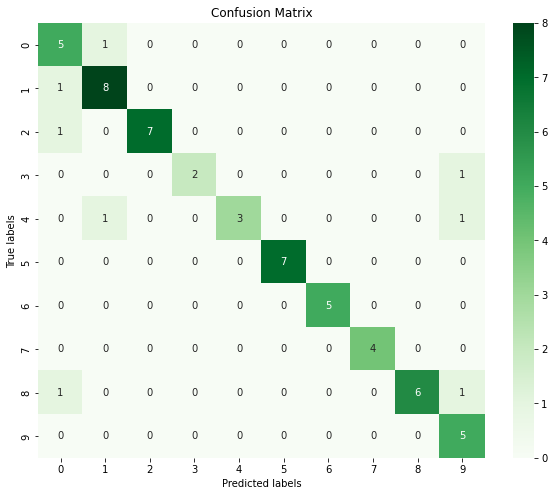

In [18]:
# Flatten
draw_cf_matrix(y_flatten_test, y_flatten_pred)
print(classification_report(y_flatten_test, y_flatten_pred, target_names=classes))

                  precision    recall  f1-score   support

       jackfruit       1.00      0.83      0.91         6
          coffee       0.89      0.89      0.89         9
   bitter orange       1.00      1.00      1.00         8
 barbados cherry       1.00      1.00      1.00         3
           betel       1.00      1.00      1.00         5
caricature plant       1.00      0.86      0.92         7
          croton       0.83      1.00      0.91         5
   mulberry leaf       0.80      1.00      0.89         4
coeur demoiselle       1.00      1.00      1.00         8
   ashanti blood       1.00      1.00      1.00         5

        accuracy                           0.95        60
       macro avg       0.95      0.96      0.95        60
    weighted avg       0.96      0.95      0.95        60



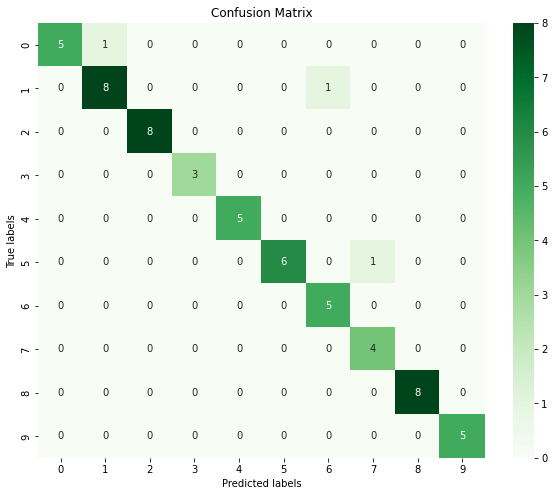

In [19]:
# H.O.G
draw_cf_matrix(y_hog_test, y_hog_pred)
print(classification_report(y_hog_test, y_hog_pred, target_names=classes))